In [1]:
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt

# GAUSSIAN
## PART III


Data generation

(a) Use Gaussian distribution with appropriate parameters and produce a dataset with
four classes and 30 samples per class: 

the classes must live in the 2D space and be centered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), 

all with independent components each with variance 0.3.



(b) Obtain a 2-class train set [X, Y] by having data on same corners sharing the
same class with labels +1 and -1.



(c) Generate a test set $[X_{te}, Y_{te}]$ from the same distribution, starting with 200 samples
per class.


(d) Visualize both sets using a scatter plot on a 2-D plane.

(e) Repeat (a)-(d) for Laplace distribution.

In [2]:
# TRAIN

train_samples_per_class = 30

# Set the variance for each class
variance = 0.3

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n1b = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2a = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))

labels = np.array([1]*train_samples_per_class*2 + [-1]*train_samples_per_class*2)


X_train = np.vstack([n1a, n1b, n2a, n2b])
Y_train = labels

shuffle_idx = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffle_idx]
Y_train = Y_train[shuffle_idx]


# TEST


test_samples_per_class = 200

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n1b = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2a = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))

labels = np.array([1]*test_samples_per_class*2 + [-1]*test_samples_per_class*2)


X_test = np.vstack([n1a, n1b, n2a, n2b])
Y_test = labels

shuffle_idx = np.random.permutation(X_test.shape[0])
X_test = X_test[shuffle_idx]
Y_test = Y_test[shuffle_idx]

In [3]:
def soft_margin_SVM_fit(X, Y, C=1.0):
    
    n = X.shape[0] # n datapoints
    d = X.shape[1] # d dimensions
    hinge_loss = lambda x: np.maximum(0, 1-x)
    
    
    kernel = lambda params: 0.5*np.linalg.norm(params[:-1])**2 + C * np.sum(hinge_loss(Y * (np.dot(X, params[:-1]) - params[-1])))

    return sco.minimize(kernel, np.zeros(d+1))
    # return sco.fmin(kernel, np.ones(d+1), disp=False)

In [4]:
params = soft_margin_SVM_fit(X_train, Y_train, C = 10).x
params = params

In [5]:
params

array([-3.19290489,  0.40540604, -1.21902546])

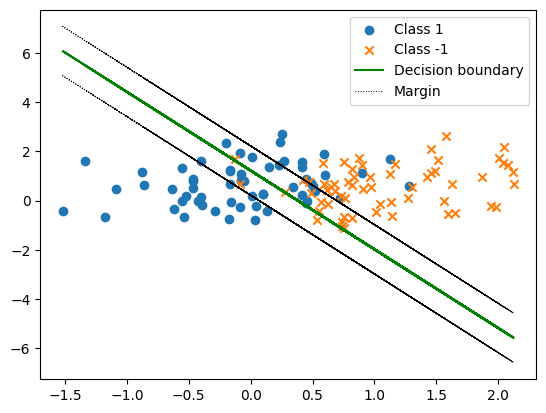

In [6]:
# plt.plot(X_train[:, 0], X_train[:, 1], 'o')
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Class 1', marker='o')
plt.scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], label='Class -1', marker='x')
plt.plot(X_train[:, 0], params[0]*X_train[:, 0] - params[-1], label='Decision boundary', color='green')
plt.plot(X_train[:, 0], params[0]*X_train[:, 0] - params[-1] + 1, color='black', ls=':', lw=0.7)
plt.plot(X_train[:, 0], params[0]*X_train[:, 0] - params[-1] - 1, color='black', ls=':', lw=0.7, label='Margin')
plt.legend()
plt.show()


In [7]:
Y_pred = np.sign(np.dot(X_test, params[:-1]) - params[-1])

In [8]:
accuracy = np.count_nonzero(Y_pred == Y_test) / Y_test.shape[0]

print('Accuracy: ', accuracy*100)

Accuracy:  81.625


In [9]:
hold_out_rho = 0.3
C = 5
n_rep = 10
def outCVSVM(X, Y, C, n_rep, hold_out_rho):
    n = len(X)
    n_hold_out = int(n*hold_out_rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_train = X[shuffle_idx]
        Y_train = Y[shuffle_idx]
        X_hold_out = X_train[:n_hold_out]
        Y_hold_out = Y_train[:n_hold_out]
        X_train = X_train[n_hold_out:]
        Y_train = Y_train[n_hold_out:]
        # Y_pred_hold_out = soft_margin_SVM_fit(X_train, Y_train, X_hold_out, k)
        params = soft_margin_SVM_fit(X_train, Y_train, C).x
        Y_pred_hold_out = np.sign(np.dot(X_hold_out, params[:-1]) - params[-1])
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        # Y_pred_train = soft_margin_SVM_fit(X_train, Y_train, X_train, k)
        Y_pred_train = np.sign(np.dot(X_train, params[:-1]) - params[-1])
        train_accuracy[i] = np.count_nonzero(Y_train == Y_pred_train)/len(Y_train)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [10]:
aaa = []
for C in range(1, 23, 2):
    svmout = outCVSVM(X_train, Y_train, C, n_rep, hold_out_rho)
    print("C = ", C, ": ", svmout)
    aaa.append(svmout)

C =  1 :  [88.06 86.9 ]
C =  3 :  [85.83 87.62]
C =  5 :  [87.5  87.02]
C =  7 :  [87.5  88.21]
C =  9 :  [85.   88.45]
C =  11 :  [85.28 88.1 ]
C =  13 :  [85.83 87.38]
C =  15 :  [86.67 87.62]
C =  17 :  [86.67 87.86]
C =  19 :  [85.56 88.33]
C =  21 :  [86.67 86.9 ]


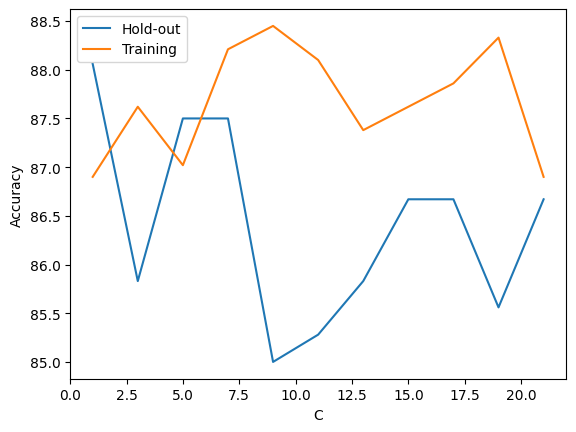

In [11]:
plt.plot(range(1, 23, 2), [x[0] for x in aaa], label="Hold-out")
plt.plot(range(1, 23, 2), [x[1] for x in aaa], label="Training")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
C_best = np.argmax([x[0] for x in aaa])*2+1
print('C =', C_best, 'is the best C for hold-out')

C = 1 is the best C for hold-out


(b) How is the value of C affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?

In [13]:
# Rho vs C
best_C = []
for rho in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # print("rho = ", rho, ": ", outCVSVM(X_train, Y_train, 5, 10, rho))
    aaa = []
    for C in range(1, 23, 2):
        svmout = outCVSVM(X_train, Y_train, C, n_rep, hold_out_rho)
        aaa.append(svmout)
    best_C.append(np.argmax([x[0] for x in aaa])*2+1)
    print('Rho = ' + str(rho) + ': C =', np.argmax([x[0] for x in aaa])*2+1, 'is the best C for hold-out')


Rho = 0.1: C = 7 is the best C for hold-out
Rho = 0.3: C = 3 is the best C for hold-out
Rho = 0.5: C = 5 is the best C for hold-out
Rho = 0.7: C = 13 is the best C for hold-out
Rho = 0.9: C = 9 is the best C for hold-out


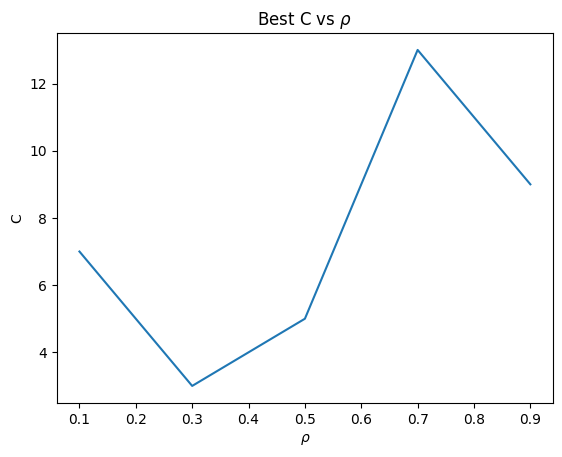

In [14]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], best_C)
plt.xlabel("$\\rho$")
plt.ylabel("C")
plt.title("Best C vs $\\rho$")
plt.show()

In [15]:
for n_rep in [1, 5, 10, 20, 30]:
    print("n_rep = ", n_rep, ": ", outCVSVM(X_train, Y_train, 5, n_rep, 0.3))

n_rep =  1 :  [97.22 83.33]
n_rep =  5 :  [86.11 88.1 ]
n_rep =  10 :  [87.5  87.26]
n_rep =  20 :  [87.92 87.14]
n_rep =  30 :  [86.94 87.54]


In [16]:
best_C_nrep = []
for n_rep in [1, 5, 10, 20, 30]:
    # print("rho = ", rho, ": ", outCVSVM(X_train, Y_train, 5, 10, rho))
    aaa = []
    for C in range(1, 23, 2):
        svmout = outCVSVM(X_train, Y_train, C, n_rep, 0.3)
        aaa.append(svmout)
    best_C_nrep.append(np.argmax([x[0] for x in aaa])*2+1)
    # print('N_rep = ' + str(rho) + ': k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')
    print('For = ' + str(n_rep) + ' repetitions: C =', np.argmax([x[0] for x in aaa])*2+1, 'is the best')


For = 1 repetitions: C = 3 is the best
For = 5 repetitions: C = 1 is the best
For = 10 repetitions: C = 17 is the best
For = 20 repetitions: C = 11 is the best
For = 30 repetitions: C = 7 is the best


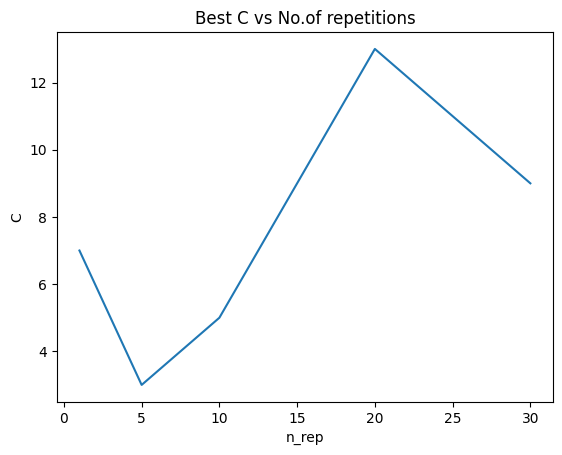

In [17]:
#k vs n_rep
plt.plot([1, 5, 10, 20, 30], best_C)
plt.xlabel('n_rep')
plt.ylabel('C')
plt.title('Best C vs No.of repetitions')
plt.show()